In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
dfLast = pd.read_excel("Last_PV.xlsx")
dfLast2012 = pd.read_excel("Daten_Preise_Last_2012.xlsx")
dfLast2012

,Year,Month,Day,Hour,Netzlast [MW],Wind [MW],PV [MW],Spotpreis [Euro/MWh]
0,2012,1,1,1,46229.0,4611.9100,0.0,23.50
1,2012,1,1,2,44014.0,4916.7875,0.0,17.15
2,2012,1,1,3,41854.0,5457.1750,0.0,8.50
3,2012,1,1,4,40309.0,6145.6400,0.0,3.06
4,2012,1,1,5,39440.0,6811.8075,0.0,2.99
...,...,...,...,...,...,...,...,...
8779,2012,12,31,20,53203.0,18495.3650,0.0,23.50
8780,2012,12,31,21,48519.0,18397.7075,0.0,12.50
8781,2012,12,31,22,46691.0,18844.8175,0.0,1.61
8782,2012,12,31,23,47029.0,18653.6225,0.0,0.01


## 3.1

In [40]:
#a)
def Leistungsdauerlinien_PV(dfLast):
    # define data values
    x = range(8760)  # X-axis points
    Last = dfLast["Last"].to_numpy()
    Last = np.sort(Last)[::-1]


    for i in range(5):
        PV_Leistung = i*50*(10**3)
        Residuallast = (dfLast["Last"] - dfLast["PV"]*PV_Leistung).to_numpy()
        Residuallast = np.sort(Residuallast)[::-1]
        plt.title((str(i*50)+ " GW installierte PV Leistung"))
        plt.xlabel("Stunden [h]")
        plt.ylabel("Leistung [MW]")
        plt.plot(x, Last, label="Last")  
        plt.plot(x, Residuallast, label="Residuallast")
        plt.legend()
        plt.show()  # display



def Leistungsdauerlinien_PV_Wind(dfLast2012):

    # define data values
    x = range(8784)  # X-axis points
    Last = dfLast2012["Netzlast [MW]"].to_numpy()
    Last = np.sort(Last)[::-1]

    PV_Leistung = i*50*(10**3)
    Residuallast = (dfLast2012["Netzlast [MW]"] - dfLast2012["PV [MW]"] - dfLast2012["Wind [MW]"]).to_numpy()
    Residuallast = np.sort(Residuallast)[::-1]
    plt.title("Leistungsdauerlinie 2012")
    plt.xlabel("Stunden [h]")
    plt.ylabel("Leistung [MW]")
    plt.plot(x, Last, label="Last")  
    plt.plot(x, Residuallast, label="Residuallast")
    plt.legend()
    plt.show()  # display




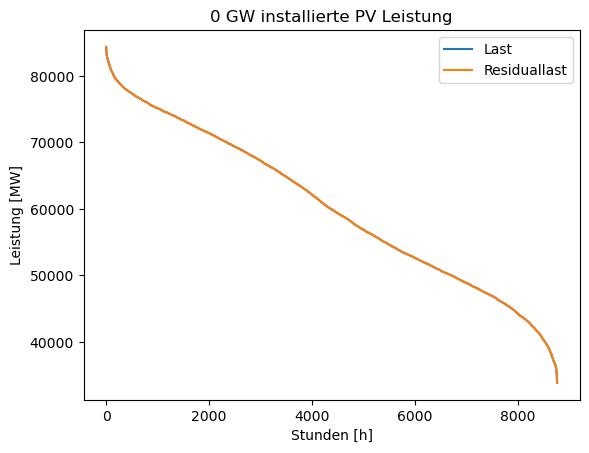

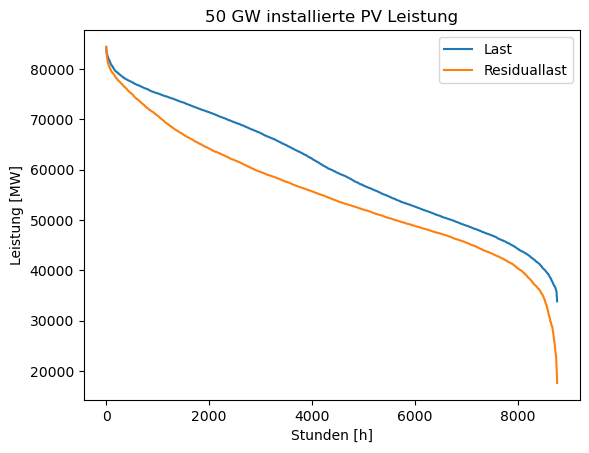

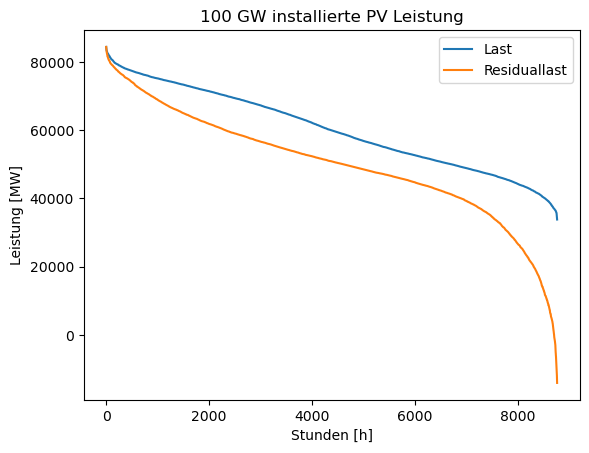

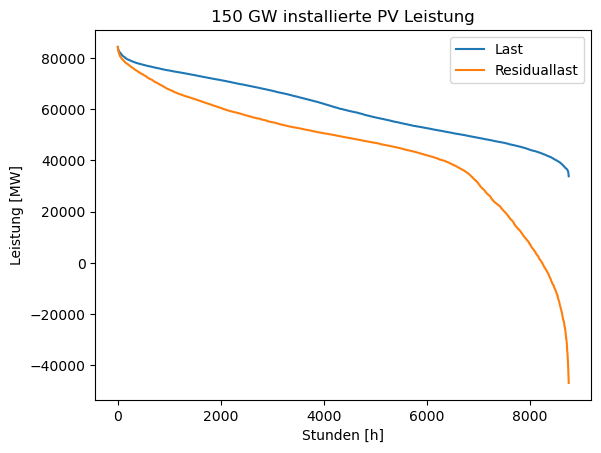

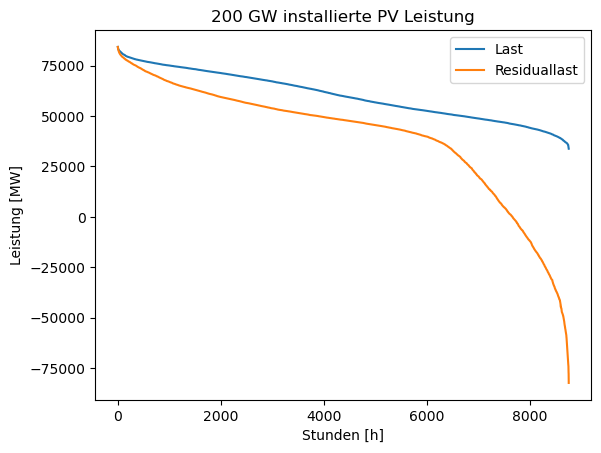

Der Photovoltaikstrom kann die Lastspitzen kaum bis gar nicht abfedern. Die Photovoltaikleistung kann bis 50GW zu 100 Prozent die Residuallast verringern.
 Ab 100GW gibt es in einigen Stunden mit geringem Stromverbrauch einen Überschuss an Solarstrom (negative Residuallast).


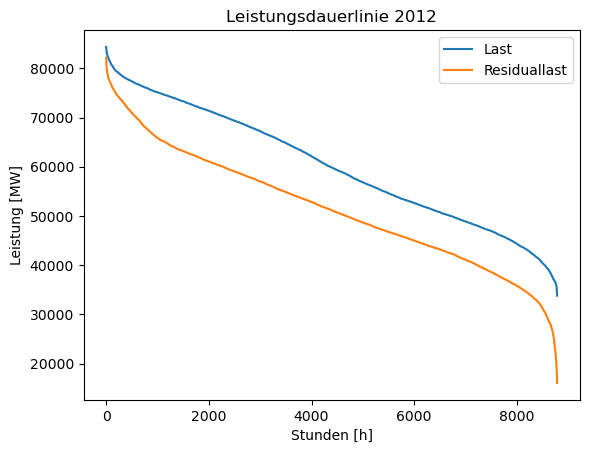

In [43]:
Leistungsdauerlinien_PV(dfLast)
print("Der Photovoltaikstrom kann die Lastspitzen kaum bis gar nicht abfedern. Die Photovoltaikleistung kann bis 50GW zu 100 Prozent die Residuallast verringern.\n Ab 100GW gibt es in einigen Stunden mit geringem Stromverbrauch einen Überschuss an Solarstrom (negative Residuallast).")
Leistungsdauerlinien_PV_Wind(dfLast2012)

In [49]:
dfLast2012

,Year,Month,Day,Hour,Netzlast [MW],Wind [MW],PV [MW],Spotpreis [Euro/MWh]
0,2012,1,1,1,46229.0,4611.9100,0.0,23.50
1,2012,1,1,2,44014.0,4916.7875,0.0,17.15
2,2012,1,1,3,41854.0,5457.1750,0.0,8.50
3,2012,1,1,4,40309.0,6145.6400,0.0,3.06
4,2012,1,1,5,39440.0,6811.8075,0.0,2.99
...,...,...,...,...,...,...,...,...
8779,2012,12,31,20,53203.0,18495.3650,0.0,23.50
8780,2012,12,31,21,48519.0,18397.7075,0.0,12.50
8781,2012,12,31,22,46691.0,18844.8175,0.0,1.61
8782,2012,12,31,23,47029.0,18653.6225,0.0,0.01


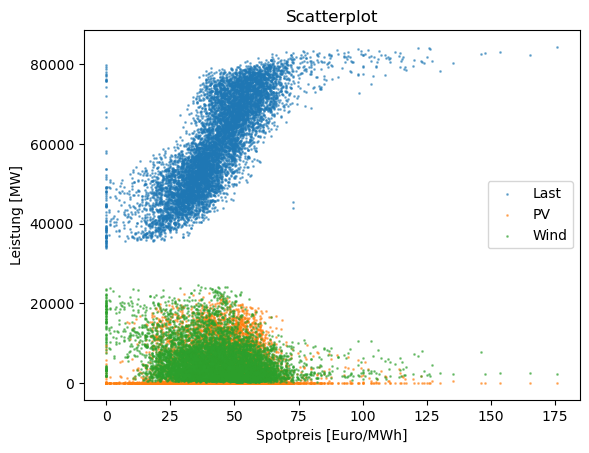

In [66]:
# Fixing random state for reproducibility
np.random.seed(19680801)


x = dfLast2012["Spotpreis [Euro/MWh]"].to_numpy()
area = (30)  # 0 to 15 point radii
plt.title("Scatterplot")
plt.xlabel("Spotpreis [Euro/MWh]")
plt.ylabel("Leistung [MW]")
plt.scatter(x, dfLast2012["Netzlast [MW]"], alpha=0.5, s=1, label="Last")
plt.scatter(x, dfLast2012["PV [MW]"], alpha=0.5, s=1, label="PV")
plt.scatter(x, dfLast2012["Wind [MW]"], alpha=0.5, s=1, label="Wind")
plt.legend()

Der Scatterplot deckt sich mit den Erwartungen. Hohe Strompreise treten ausschließlich bei sehr großen Netzlasten auf. Umgekehrt spiegelt sich die Produktion von erneuerbaren Energien in den Strompreisen wieder. Bei hoher Stromproduktion aus Wind und Photovoltaik sind die Strompreise tendenziell niedriger.